In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-trip-fare-prediction/taxi_fare/submission.csv
/kaggle/input/taxi-trip-fare-prediction/taxi_fare/train.csv
/kaggle/input/taxi-trip-fare-prediction/taxi_fare/test.csv


Goal: Write a machine-learning model to predict taxi-trip fare.

In [ ]:
test = pd.read_csv('/kaggle/input/taxi-trip-fare-prediction/taxi_fare/test.csv')
train= pd.read_csv('/kaggle/input/taxi-trip-fare-prediction/taxi_fare/train.csv')

In [ ]:
train.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


Text(0.5, 1.0, 'Correlations')

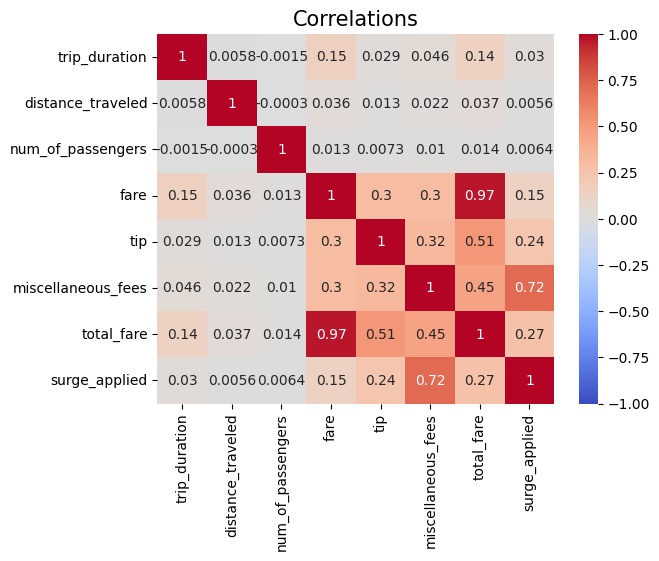

In [ ]:
sns.heatmap(train.corr(),annot=True,vmin=-1,center=0,vmax=1, cmap = 'coolwarm')
plt.title('Correlations',fontsize=15)

going to use distance_traveled and num_of_passengers as predictors.

In [ ]:
train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


removing outliers.

In [ ]:
from scipy.stats import zscore
def remove_outliers(df, columns, threshold=3):
    """
    Remove outliers from specified numerical columns of a DataFrame using the Z-score method.

    Parameters:
    - df: DataFrame
        The input DataFrame.
    - columns: list
        List of column names to consider for outlier removal.
    - threshold: float, optional (default=3)
        Z-score threshold beyond which data points are considered outliers.

    Returns:
    - df_filtered: DataFrame
        DataFrame with outliers removed.
    """

    df_filtered = df.copy()

    # Iterate through specified columns
    for column in columns:
        # Calculate Z-scores for each data point in the column
        z_scores = zscore(df[column])

        # Identify outliers based on the Z-score threshold
        outliers_mask = (abs(z_scores) > threshold)

        # Remove outliers from the DataFrame
        df_filtered = df_filtered[~outliers_mask]

    return df_filtered

In [ ]:
train = remove_outliers(train,train.columns)

/tmp/ipykernel_42/3136523440.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[~outliers_mask]
/tmp/ipykernel_42/3136523440.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[~outliers_mask]
/tmp/ipykernel_42/3136523440.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[~outliers_mask]
/tmp/ipykernel_42/3136523440.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[~outliers_mask]
/tmp/ipykernel_42/3136523440.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[~outliers_mask]
/tmp/ipykernel_42/3136523440.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[~outliers_mask]
/tmp/ipykernel_42/3136523440.py:30: UserWarning: Boolean Series 

In [ ]:
import statsmodels.api as sm

<Axes: xlabel='distance_traveled', ylabel='fare'>

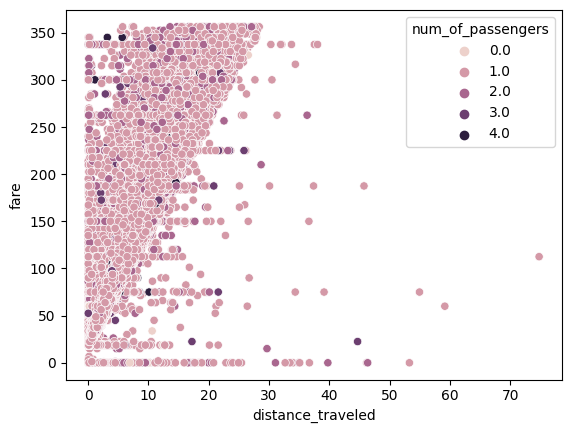

In [ ]:
sns.scatterplot(y='fare',x='distance_traveled',hue='num_of_passengers', data=train)


<Axes: xlabel='trip_duration', ylabel='fare'>

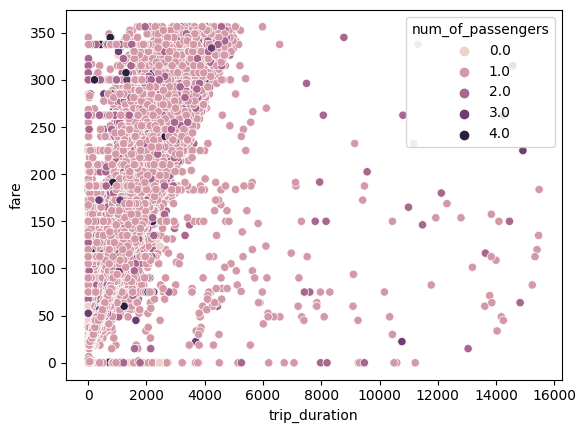

In [ ]:
sns.scatterplot(y='fare',x='trip_duration',hue='num_of_passengers', data=train)


In [ ]:
model = sm.OLS(train['fare'],sm.add_constant(train[['distance_traveled','num_of_passengers']])).fit()

In [ ]:
model.rsquared_adj

0.8120013435606325

The model can account for 81% of the variation in house prices.
The model is 81% accurate.

In [ ]:
test = remove_outliers(test, test.columns)

/tmp/ipykernel_42/3136523440.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[~outliers_mask]
/tmp/ipykernel_42/3136523440.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[~outliers_mask]
/tmp/ipykernel_42/3136523440.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[~outliers_mask]
/tmp/ipykernel_42/3136523440.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[~outliers_mask]
/tmp/ipykernel_42/3136523440.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[~outliers_mask]
/tmp/ipykernel_42/3136523440.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df_filtered[~outliers_mask]
/tmp/ipykernel_42/3136523440.py:30: UserWarning: Boolean Series 

In [ ]:
fare_pred = model.predict(sm.add_constant(test[['distance_traveled','num_of_passengers']]))

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(fare_pred,test['fare'])

11596.422314340722

The mean-squared-error is $11,596 which is relatively small. The model is good enough to make predictions but can be improved upon.